# ft_linear_regression

Import the libraries:
- `pandas` is used to analyze data

In [90]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

## Read and display data.csv

In [91]:
data_frame = pandas.read_csv('./data.csv')
print(data_frame)

        km  price
0   240000   3650
1   139800   3800
2   150500   4400
3   185530   4450
4   176000   5250
5   114800   5350
6   166800   5800
7    89000   5990
8   144500   5999
9    84000   6200
10   82029   6390
11   63060   6390
12   74000   6600
13   97500   6800
14   67000   6800
15   76025   6900
16   48235   6900
17   93000   6990
18   60949   7490
19   65674   7555
20   54000   7990
21   68500   7990
22   22899   7990
23   61789   8290


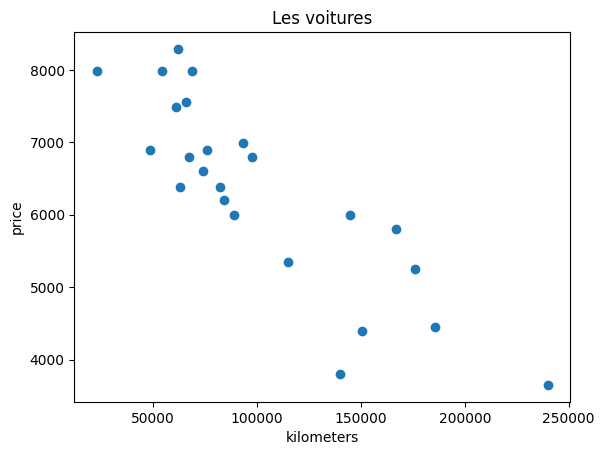

In [92]:
mileages = data_frame['km']
prices = data_frame['price']

plt.scatter(kms, prices)
plt.title('Les voitures')
plt.xlabel('kilometers')
plt.ylabel('price')
plt.show()

In [93]:
bias = 0
weight = 0

## Utils

In [94]:
def read_params():
    with open('./model_parameters.txt', 'r') as file:
        lines = file.readlines()
        bias = float(lines[0].strip())
        weight = float(lines[1].strip())
    return bias, weight

In [95]:
def write_params(bias, weight):
    with open('./model_parameters.txt', 'w') as file:
        file.write(f'{bias}\n{weight}')

In [96]:
def estimate_price(mileage, bias, weight):
    return bias + (weight * mileage)

## Training

Read the model parameters from the text file:

bias: 0.6331833333333333 - weight: 58290.25254166667

bias: -589116.4572905735 - weight: -75038998904.6359

bias: 758390433247.6532 - weight: 9.660029739101555e+16

bias: -9.763022223048782e+17 - weight: -1.243569023073749e+23

bias: 1.2568276015776808e+24 - weight: 1.6008893936308207e+29

bias: -1.6179576200884904e+30 - weight: -2.0608802592276123e+35

bias: 2.0828527771958026e+36 - weight: 2.6530424024119175e+41

bias: -2.6813283843831427e+42 - weight: -3.4153532004006753e+47



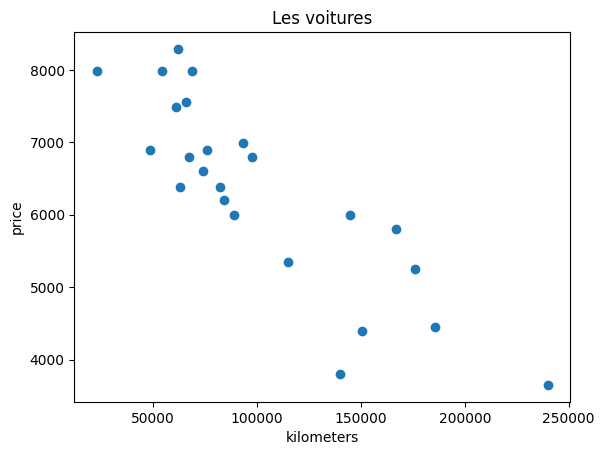

In [101]:
# Arbitrary value
learning_rate = 0.01
iteration_count = 8

# TODO: need to normalize values between 0 and 1 ??

# bias, weight = read_params()
bias, weight = 0.0, 0.0

sample_count = len(mileages)
for _ in range(iteration_count):
    dB = learning_rate * (1 / sample_count) * np.sum(estimate_price(mileages, bias, weight) - prices)
    dW = learning_rate * (1 / sample_count) * np.sum((estimate_price(mileages, bias, weight) - prices) * mileages)
    
    bias = bias - learning_rate * dB
    weight = weight - learning_rate * dW


    print(f'bias: {bias} - weight: {weight}\n')
write_params(bias, weight)

plt.scatter(mileages, prices)
plt.title('Les voitures')
plt.xlabel('kilometers')
plt.ylabel('price')
# plt.plot([0, 250000], [new_bias, 250000 * new_weight + bias])
plt.show()

## Prediction


Read the model parameters from a text file:

In [26]:
bias, weight = read_params()
print(f'bias: {bias} - weight: {weight}')

# Prompt the user for a mileage
try:
    mileage = float(input('Please input a mileage: '))
    # Calculate the estimated price from the model parameters
    estimated_price = estimate_price(mileage, bias, weight)
    print(f'Estimated price: {estimated_price}')
except ValueError:
    print("Invalid input. Please enter a valid number.")

Please input a mileage:  125


Estimated price: 126.1
